In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
import cv2

870


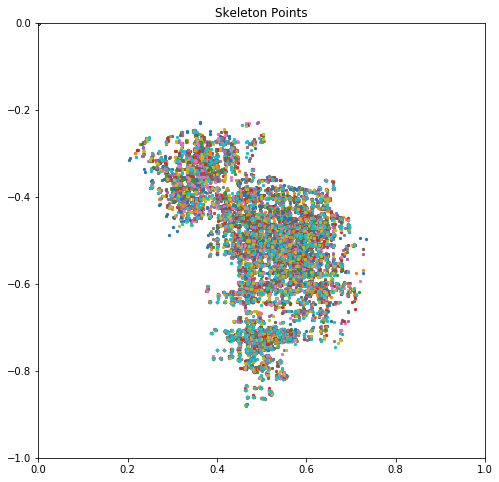

In [4]:
BASE_DIR = "D:\openpose-1.5.0-binaries-win64-gpu-python-flir-3d_recommended\openpose-1.5.0-binaries-win64-gpu-python-flir-3d_recommended\DatasetPosePerDancer\Penche"

#run through each dancer folder and plot the coordinates
count = 0
def plotCoordinates():
    fig, ax = plt.subplots(1, figsize=(8,8))
    plt.title('Skeleton Points')
    plt.xlim(0,1)
    plt.ylim(-1,0)
    global count
    for subdir, dirs, files in os.walk(BASE_DIR):
        for file in files:
            if file.endswith('.json'):
                file_path = os.path.join(BASE_DIR,subdir,file)
                #print(file_path)
                raw_img_json = pd.read_json(file_path)
                img_keypoints_list = raw_img_json.people[0]['pose_keypoints_2d']
                x = img_keypoints_list[0::3]
                posY = img_keypoints_list[1::3]
                y = [-y for y in posY]
                sc = ax.scatter(x,y, s=5)
                count+=1
plotCoordinates()
print(count)

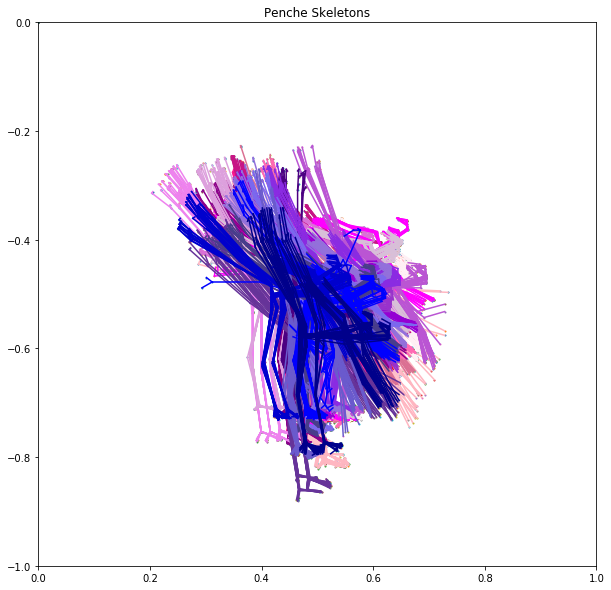

In [6]:
bones = [[0,1],[1,2],[2,3],[3,4],[1,5],[5,6],[6,7],[1,8],[8,12],[8,9],[9,10],[10,11],[11,24],[11,22],[22,23],[12,13],[13,14],[14,21],[14,19],[19,20],[0,16],[0,15],[15,17],[16,18]]
penColor = ['lightpink','pink','crimson','palevioletred','lavenderblush','hotpink','deeppink','mediumvioletred','orchid','magenta','fuchsia','darkmagenta','purple','violet','plum','thistle','mediumorchid','darkviolet','darkorchid','indigo','blueviolet','rebeccapurple','mediumpurple','mediumslateblue','darkslateblue','slateblue','blue','mediumblue','darkblue','navy']
allXList =[]
allYList = []
dancerNum = 0
def plotSkeletons():
    fig,ax = plt.subplots(1,figsize = (10,10))
    plt.title('Penche Skeletons')
    plt.xlim(0,1)
    plt.ylim(-1,0)
    global dancerNum
    for subdir, dirs, files in os.walk(BASE_DIR):
        for file in files:
            if file.endswith('.json'):
                file_path = os.path.join(BASE_DIR,subdir,file)
                raw_img_json = pd.read_json(file_path)
                img_keypoints_list = raw_img_json.people[0]['pose_keypoints_2d']
                x = img_keypoints_list[0::3]
                allXList.append(x)
                posY = img_keypoints_list[1::3]
                y = [-y for y in posY]
                allYList.append(y)
                sc = ax.scatter(x,y, s=1)
                for bone in bones:
                    #Remove the 0,0 xy coordinates plotting
                    if((x[bone[0]]==0 and y[bone[0]]==0) or(x[bone[1]]==0 and y[bone[1]]==0)):
                        #print("zero values for joint: ",x.index(x[bone[0]]))
                        #print("zero values for joint: ",x.index(x[bone[1]]))
                        continue
                    #ax.plot([x_values],[y_values])
                    ax.plot([x[bone[0]],x[bone[1]]],[y[bone[0]],y[bone[1]]],penColor[dancerNum-1])
        dancerNum+=1
plotSkeletons()

In [7]:
np.save('allPencheXList.npy', allXList)
np.save('allPencheYList.npy', allYList)

In [8]:
xloaded = np.load('allPencheXList.npy')
print(xloaded)
print(len(xloaded))
yloaded = np.load('allPencheYList.npy')
print(yloaded)
print(len(yloaded))

[[0.634003 0.59511  0.578772 ... 0.286807 0.288773 0.319416]
 [0.64629  0.597245 0.58296  ... 0.303125 0.305166 0.331598]
 [0.646342 0.597253 0.582909 ... 0.309206 0.313245 0.333683]
 ...
 [0.625798 0.578768 0.574757 ... 0.       0.       0.439899]
 [0.625755 0.578795 0.576784 ... 0.41743  0.417506 0.42769 ]
 [0.625829 0.576757 0.564624 ... 0.433773 0.       0.443958]]
870
[[-0.404427 -0.450678 -0.434298 ... -0.445077 -0.439684 -0.456077]
 [-0.445268 -0.485981 -0.461506 ... -0.366199 -0.366166 -0.393378]
 [-0.46694  -0.497005 -0.472518 ... -0.33893  -0.338943 -0.36349 ]
 ...
 [-0.58412  -0.589548 -0.562337 ...  0.        0.       -0.401478]
 [-0.584116 -0.581505 -0.559593 ... -0.355212 -0.358039 -0.396115]
 [-0.575971 -0.581393 -0.556865 ... -0.341702  0.       -0.390673]]
870


In [9]:
# Now calculate mean skeleton:
sumXList = [sum(i) for i in zip(*allXList)]# the * indicates the use of iterables
sumYList = [sum(j) for j in zip(*allYList)]
print(sumXList)
print(sumYList)

#Get the average: sum/count
avgXList = [sx / count for sx in sumXList]
avgYList = [sy / count for sy in sumYList]
print(avgXList)
print(avgYList)

[529.6960129999999, 489.82837600000016, 484.52217799999914, 450.6471619999995, 417.8738820000007, 497.3841229999994, 521.0195549999996, 549.6056020000001, 416.5470429999996, 415.2877409999999, 377.01975, 332.8190070000001, 418.2212059999993, 410.1101720000004, 409.9757549999999, 528.6852279999996, 8.311501, 514.6801109999994, 0, 422.5075350000002, 399.66456800000066, 393.6414259999998, 285.6614720000004, 256.6922739999998, 319.9553840000003]
[-426.2083819999997, -440.4551119999997, -421.34461999999974, -394.61421699999977, -365.090869, -460.94966500000027, -501.62413000000026, -535.8575060000001, -448.0930920000001, -430.9281999999996, -405.8224349999999, -361.73381300000045, -465.6037950000002, -544.1053929999995, -610.2084479999997, -417.37679100000014, -7.376810000000001, -411.4781079999997, 0, -607.3113590000007, -575.9574209999997, -604.5845339999996, -309.74215899999996, -289.7671140000003, -347.438519]
[0.6088459919540229, 0.5630211218390806, 0.5569220436781599, 0.51798524367816

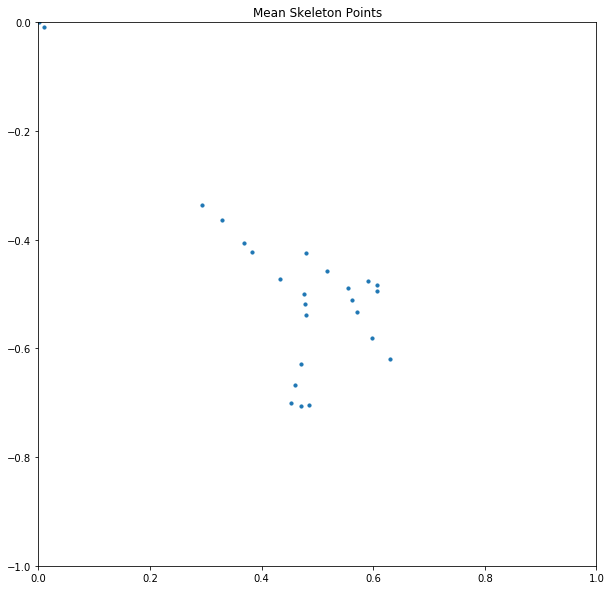

In [8]:
bones = [[0,1],[1,2],[2,3],[3,4],[1,5],[5,6],[6,7],[1,8],[8,12],[8,9],[9,10],[10,11],[11,24],[11,22],[22,23],[12,13],[13,14],[14,21],[14,19],[19,20],[0,16],[0,15],[15,17],[16,18]]
#Plot mean skeleton:
def plotMeanCoordinates():
    fig, ax = plt.subplots(1, figsize=(10,10))
    plt.title('Mean Skeleton Points')
    plt.xlim(0, 1)
    plt.ylim(-1, 0)
    sc = ax.scatter(avgXList,avgYList, s=10)
    #for bone in bones:
        #if avgXList[bone[0]]== 0.0 or avgYList[bone[0]] == 0.0  or avgXList[bone[1]] == 0.0 or avgYList[bone[1]] == 0.0:
            #print("zero values for joint: ",avgXList.index(avgXList[bone[0]]))
            #print("zero values for joint: ",avgXList.index(avgXList[bone[1]]))
            
        #ax.plot([avgXList[bone[0]],avgXList[bone[1]]],[avgYList[bone[0]],avgYList[bone[1]]])
plotMeanCoordinates()

In [10]:
#calculation of standard deviation values:
import statistics

In [11]:
standardDeviationX = [statistics.stdev(i) for i in zip(*allXList)]
standardDeviationY = [statistics.stdev(i) for i in zip(*allYList)]

print("Standard Deviations of X values:",standardDeviationX)
print("Standard Deviations of Y values:",standardDeviationY) 

Standard Deviations of X values: [0.03412950373703013, 0.03312766178853364, 0.03156757676669195, 0.032647114707581214, 0.04474002041370337, 0.0348588123302087, 0.03945260059359854, 0.04857004095637988, 0.032923510518118926, 0.03186563205768292, 0.05616728151195319, 0.07787142665339544, 0.034193345873292556, 0.054002142297849505, 0.08717023190240389, 0.0342299636431154, 0.07492084542270609, 0.03380019873161263, 0.0, 0.11961806370052898, 0.15670570071224987, 0.11838837005988598, 0.1403915245142415, 0.16362413988514476, 0.1002887907661776]
Standard Deviations of Y values: [0.04962788588929168, 0.04186126749200525, 0.04204831956604812, 0.038280275704492495, 0.04653908316307547, 0.042233033070739764, 0.04585642657062904, 0.056889289389398454, 0.026825027869400015, 0.027057763379866692, 0.08708916602342218, 0.1496096590159728, 0.02722830945387727, 0.06401013865485622, 0.1332984979520529, 0.04931273062549267, 0.06675289953648293, 0.047805611414563916, 0.0, 0.1738526893910392, 0.22661206033519

In [12]:
print(len(standardDeviationX))
print(len(avgXList))

25
25


In [13]:
np.save('PencheStdDevX.npy', standardDeviationX)
np.save('PencheStdDevY.npy', standardDeviationY)
np.save('PencheMeanX.npy', avgXList)
np.save('PencheMeanY.npy', avgYList)